In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import tradermade as tm
import hvplot.pandas
import seaborn as sns
from pathlib import Path
from datetime import datetime
from MCForecastTools import MCSimulation
! pip install TA-Lib
%matplotlib inline


  Using cached TA-Lib-0.4.21.tar.gz (270 kB)
  Running setup.py clean for TA-Lib
Failed to build TA-Lib
    Running setup.py install for TA-Lib: started
    Running setup.py install for TA-Lib: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Kane\anaconda3\envs\alpacaenv\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Kane\\AppData\\Local\\Temp\\pip-install-oainzsjp\\ta-lib_210c51522c39458ea957590275d6cd49\\setup.py'"'"'; __file__='"'"'C:\\Users\\Kane\\AppData\\Local\\Temp\\pip-install-oainzsjp\\ta-lib_210c51522c39458ea957590275d6cd49\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Kane\AppData\Local\Temp\pip-wheel-oy7hejyp'
       cwd: C:\Users\Kane\AppData\Local\Temp\pip-install-oainzsjp\ta-lib_210c51522c39458ea957590275d6cd49\
  Complete output (21 lines):
  C:\Users\Kane\AppData\Local\Temp\pip-install-oainzsjp\ta-lib_210c51522c39458ea957590275d6cd49\setup.py:76: UserWarning: Cannot find ta-lib library, installation may fail.
    warnings.warn('Cannot find ta-lib li

In [2]:
# set api key
tm.set_rest_api_key("CUA67dmfyikCZvVcLu_S")

In [3]:
#set time for today to get live data in time series
today = datetime.now().date


In [4]:
"""EUR/USD (Euro/US Dollar)
NZD/USD (New Zealand Dollar/US Dollar)
GBP/USD (British Pound/US Dollar)
USD/CAD (US Dollar/Canadian Dollar)
AUD/USD (Australian Dollar/US Dollar)"""
 
#get data
live_data = tm.live(currency='EURUSD,GBPUSD,NZDUSD,USDCAD,AUDUSD',fields=["bid", "mid", "ask"]) # returns live data - fields is optional
multiple_timeseries_data_1y = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2020-08-20", end = 'today', interval="daily",fields=["close"])
multiple_timeseries_data_1m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-07-19",end="today",interval="hourly",fields=["close"])         


# multiple_timeseries_data_6m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-02-19",end="2021-08-16",interval="daily",fields=["close"])
# multiple_timeseries_data_3m = tm.timeseries(currency='EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD', start="2021-05-19",end="2021-08-16",interval="daily",fields=["close"])


In [5]:
# save to CSV file
#multiple_timeseries_data_1y.to_csv(path_or_buf = '../project1/1y_data.csv', index = False)
#multiple_timeseries_data_1m.to_csv(path_or_buf = '../project1/1m_data.csv', index = False)

# Set the path
file_path = Path('../project1/1y_data.csv')
path_file = Path('../project1/1m_data.csv')
one_year_csv_df = pd.read_csv(file_path)
one_month_csv_df = pd.read_csv(path_file)
one_year_csv_df.head()

,date,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
0,2020-08-20,1.18599,1.32140,0.65353,0.75830,0.71921
1,2020-08-21,1.17964,1.30897,0.65405,0.75892,0.71601
2,2020-08-24,1.17882,1.30635,0.65267,0.75660,0.71618
3,2020-08-25,1.18342,1.31511,0.65477,0.75915,0.71947
4,2020-08-26,1.18312,1.32098,0.66214,0.76074,0.72335


In [6]:
#slice the 1 year data to not do so many API calls

six_month_data_sliced = one_year_csv_df.iloc[-126:]                # set_index('date').loc['2021-02-19':'2021-08-16']
three_month_data_sliced = one_year_csv_df.iloc[-63:]               #set_index('date').loc['2021-05-19':'2021-08-16']
three_month_data_sliced.head(10)

,date,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
199,2021-05-26,1.21927,1.41223,0.72824,0.82471,0.77430
200,2021-05-27,1.21941,1.42016,0.72934,0.82871,0.77425
201,2021-05-28,1.21923,1.41904,0.72479,0.82820,0.77099
202,2021-05-31,1.22259,1.42095,0.72735,0.82919,0.77342
203,2021-06-01,1.22140,1.41497,0.72571,0.82846,0.77526
204,2021-06-02,1.22102,1.41717,0.72370,0.83089,0.77524
205,2021-06-03,1.21270,1.41061,0.71460,0.82581,0.76604
206,2021-06-04,1.21670,1.41559,0.72127,0.82777,0.77429
207,2021-06-07,1.21891,1.41762,0.72271,0.82764,0.77553
208,2021-06-08,1.21730,1.41513,0.71951,0.82559,0.77371


In [7]:
live_data

,instrument,timestamp,bid,mid,ask
0,EURUSD,2021-08-23 08:54:46,1.17271,1.17271,1.17271
1,GBPUSD,2021-08-23 08:54:46,1.36500,1.36502,1.36503
2,NZDUSD,2021-08-23 08:54:46,0.68519,0.68520,0.68521
3,USDCAD,2021-08-23 08:54:46,1.27457,1.27459,1.27460
4,AUDUSD,2021-08-23 08:54:46,0.71673,0.71673,0.71673


In [14]:
one_year_chart = one_year_csv_df.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='1 year daily data', legend='top', height=500, width=620)
six_month_chart = six_month_data_sliced.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='6 month daily data', legend='top', height=500, width=620)
three_month_chart = three_month_data_sliced.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='3 month daily data', legend='top', height=500, width=620)
one_month_chart = one_month_csv_df.hvplot.line(x='date', y=['EURUSD','GBPUSD','NZDUSD','CADUSD','AUDUSD'], 
                value_label='1 month hourly data', legend='top', height=500, width=620)
live_chart = live_data.hvplot.bar(x = 'instrument', y = 'mid')

"""We need to put the graphs in a column here, also need to start working on the dash board"""
one_year_chart

:NdOverlay   [Variable]
   :Curve   [date]   (1 year daily data)

In [9]:
# calculate daily returns of 1 year data
daily_returns = one_year_csv_df.set_index("date").pct_change().dropna()
daily_returns

,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
date,,,,,
2020-08-21,-0.005354,-0.009407,0.000796,0.000818,-0.004449
2020-08-24,-0.000695,-0.002002,-0.002110,-0.003057,0.000237
2020-08-25,0.003902,0.006706,0.003218,0.003370,0.004594
2020-08-26,-0.000254,0.004464,0.011256,0.002094,0.005393
2020-08-27,-0.000786,-0.000643,0.002703,0.001275,0.003608
...,...,...,...,...,...
2021-08-16,-0.001602,-0.001853,-0.002827,-0.004619,-0.004870
2021-08-17,-0.005774,-0.007340,-0.014331,-0.004401,-0.010973
2021-08-18,-0.000034,0.000728,-0.005694,-0.002539,-0.002949


In [31]:
AUDUSD = daily_returns[['AUDUSD']]
AUDUSD.head()

,AUDUSD
date,
2020-08-21,-0.004449
2020-08-24,0.000237
2020-08-25,0.004594
2020-08-26,0.005393
2020-08-27,0.003608


In [33]:
# Set number of simulations
num_sims = 100

# Configure a Monte Carlo simulation to forecast three years daily returns
# YOUR CODE HERE!
MC_forex = MCSimulation(
    portfolio_data = AUDUSD,
    num_simulation = num_sims,
    num_trading_days = 500
)

IndexError: Too many levels: Index has only 1 level, not 2

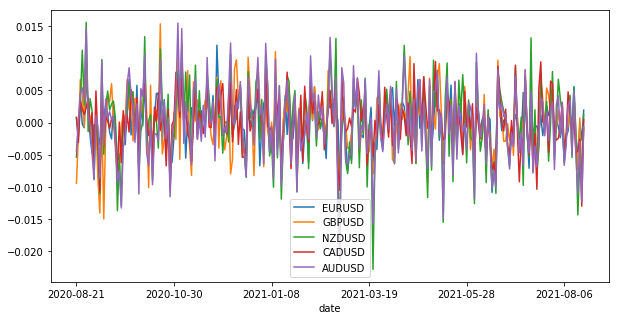

In [10]:
daily_returns.plot(figsize=(10,5))

In [11]:
#Corelation between forex pairs
correlation = daily_returns.corr()
correlation

,EURUSD,GBPUSD,NZDUSD,CADUSD,AUDUSD
EURUSD,1.000000,0.580408,0.655937,0.519070,0.703789
GBPUSD,0.580408,1.000000,0.640573,0.572231,0.696138
NZDUSD,0.655937,0.640573,1.000000,0.676372,0.895336
CADUSD,0.519070,0.572231,0.676372,1.000000,0.727283
AUDUSD,0.703789,0.696138,0.895336,0.727283,1.000000


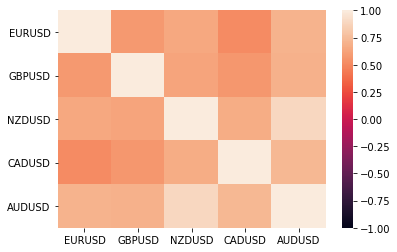

In [12]:
sns.heatmap(correlation, vmin=-1, vmax=1)